# # # Project Overview
In this Data Analysis R Project, we delve into one of the most fundamental applications of machine learning – Customer Segmentation. Using a dataset with information about mall customers and their attributes such as age, gender, annual income, spending score, and more, our objective is to dissect and categorize these customers into distinct segments. By doing so, we aim to uncover meaningful patterns and insights within the data, enabling us to tailor our services and marketing strategies to meet the diverse needs and preferences of each customer segment effectively.

# # # # What is Customer Segmentation?
Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits. 

# # # # How to Implement Customer Segmentation in R?
In this analysis, the goal is to understand the different types of people who visit the mall, enabling the customization of services and marketing strategies for better effectiveness. To begin, we'll embark on an exploration of the mall dataset, importing it alongside essential libraries. This initial exploration will provide us with a foundational understanding of the dataset, setting the stage for subsequent steps in the segmentation process. Next, we'll employ **K-means**, a fundamental algorithm for grouping unlabeled datasets. Additionally, we'll utilize **Principal Component Analysis**.This will aid in simplifying the data and make it easier to visualize and interpret, ultimately enhancing the effectiveness of our segmentation analysis. 

Let's begin!

In [11]:
library(tidyverse)
library(psych)

# import dataset
customer_data = read.csv("/kaggle/input/mall-customers/Mall_Customers.csv")
# view the structure of the dataset
str(customer_data)
# view the head the dataset
head(customer_data)
# perform basic summary decriptive stats on the dataset
summary(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

# # # # # Customer Gender Visualization

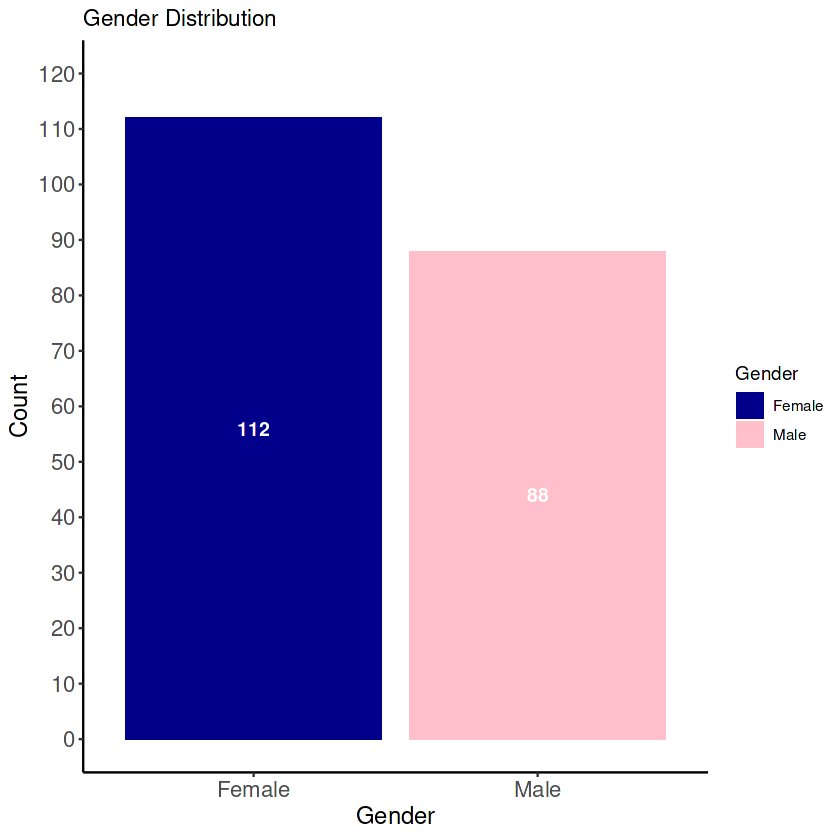

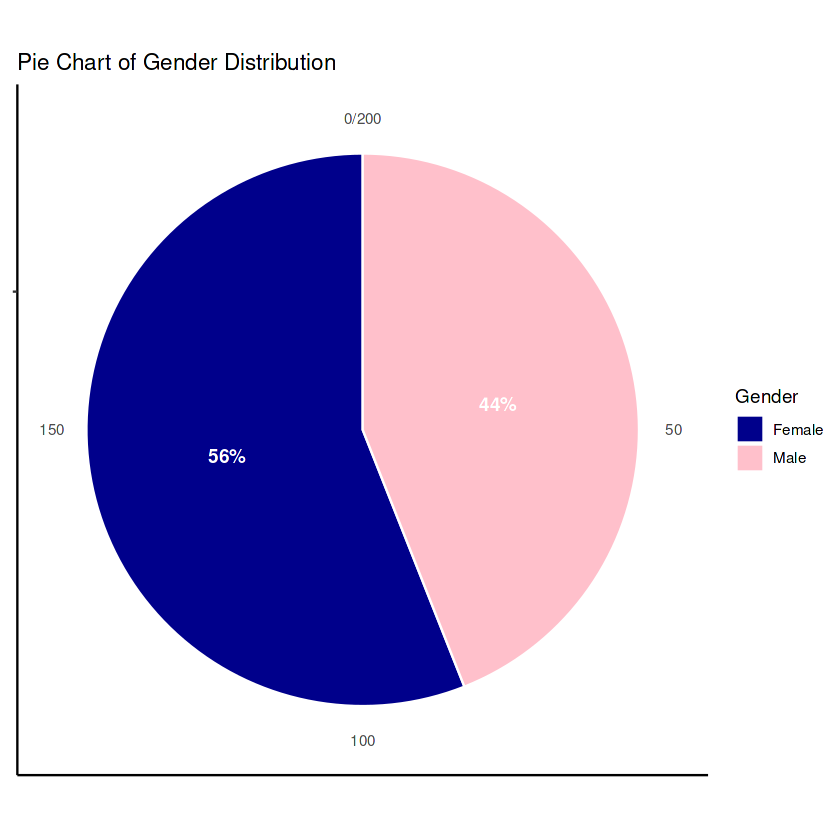

In [31]:

# Barplot for Gender Distribution
ggplot(customer_data, aes(x=Gender, fill = Gender )) + 
  geom_bar() +
  labs(title="Gender Distribution", x="Gender", y="Count") +
  theme_classic() +
  scale_fill_manual(values=c("darkblue", "pink")) +
  scale_y_continuous( breaks = seq(0,120,10), limits = c(0,120)) +
 # Add total count on top of each bar
  geom_text(aes(label=after_stat(count)), stat="count",position=position_stack(vjust=0.5),size=4,color="white",fontface="bold") +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

# Pie Chart for Gender Distribution using ggplot2
customer_data %>%
  count(Gender) %>%
  ggplot(aes(x="", y=n, fill=Gender)) +
  geom_bar(width = 1, stat = "identity", color="white") +
  coord_polar("y", start=0) +
  geom_text(aes(label = scales::percent(n/sum(n))), position = position_stack(vjust=0.5),color = "white",fontface="bold") +
  labs(title="Pie Chart of Gender Distribution", x=NULL, y=NULL) +
  theme_classic() +
  scale_fill_manual(values=c("darkblue", "pink"))

**Looking at the gender distribution plots above we can see that most of customers are females but we also have a good amount of male customers too.**

# # # # # Age Distribution Visualization

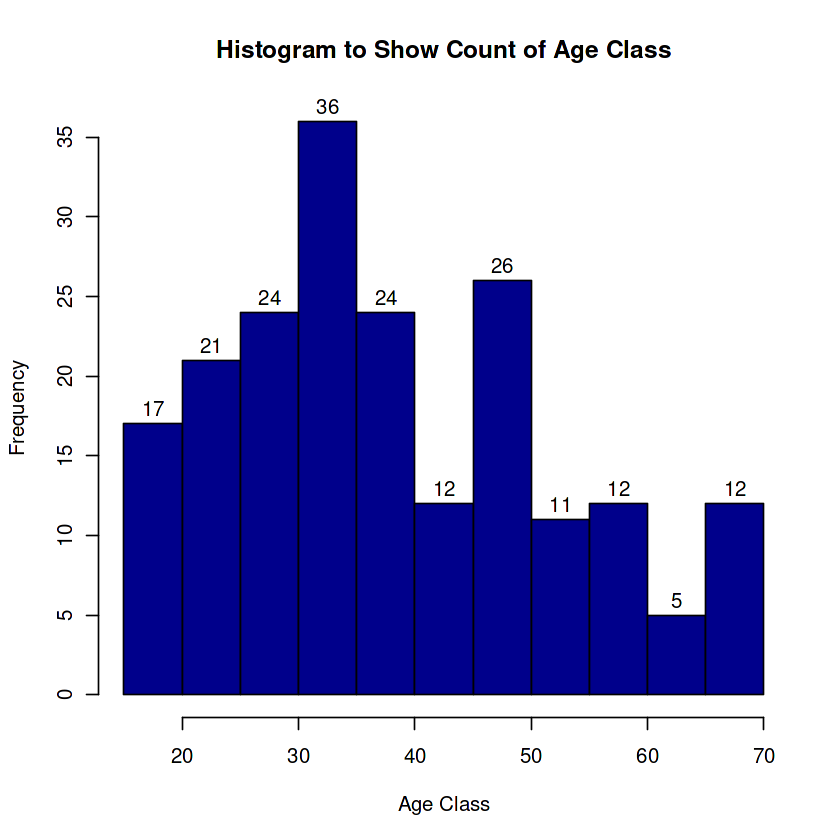

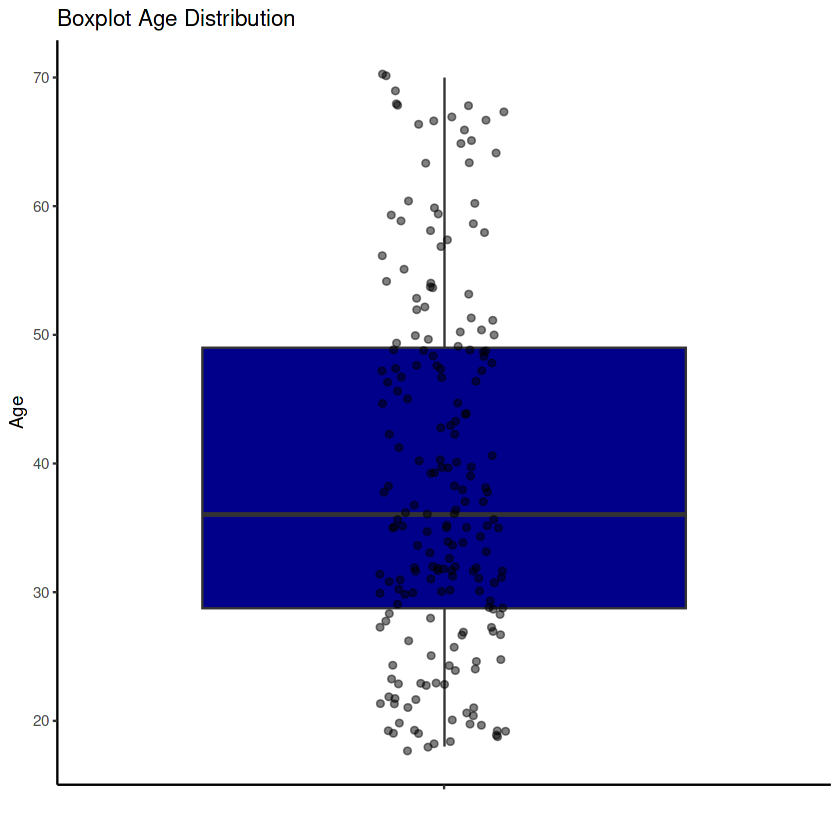

In [4]:
# Histogram for Age distribution
hist(customer_data$Age,
    col="darkblue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

# Boxplot for customer ages
ggplot(customer_data, aes(x = "", y = Age)) +
  geom_boxplot(fill = "darkblue") +
  geom_jitter(width = 0.1, color = "black", alpha = 0.5) +
  labs(title = "Boxplot Age Distribution", x = '', y = 'Age') +
  theme_classic()

**From the age distribution plots, it's evident that the majority of our customers are between the ages of 20 and 40. Overall, our customer base mostly comprises individuals under the age of 40.**

# # # Customers Anaual Income Visualization

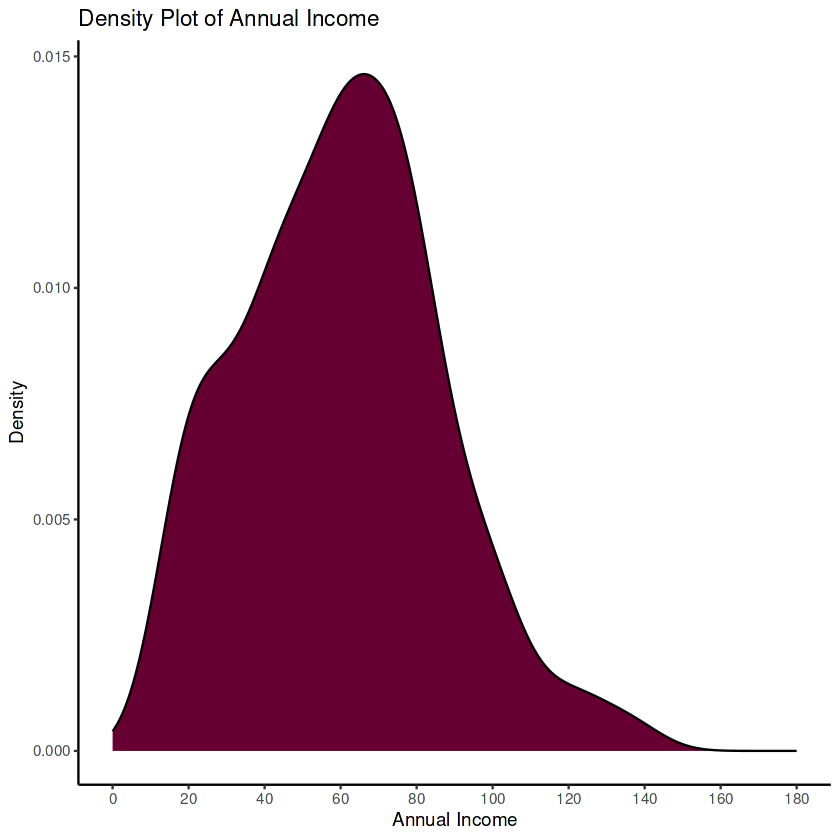

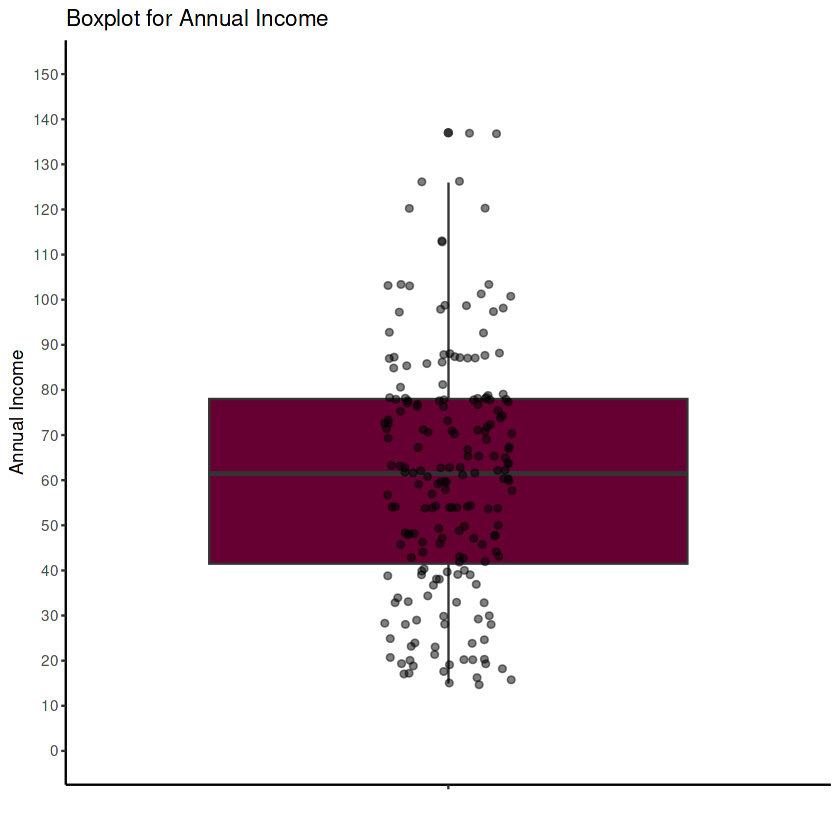

In [9]:
# Density plot for for Annual Income
ggplot(customer_data, aes(x = Annual.Income..k..)) +
  geom_density(fill = "#660033", color = "black") +
  labs(title = "Density Plot of Annual Income", x = 'Annual Income', y = 'Density') +
  theme_classic() +
  scale_x_continuous(limits = c(0, 180), breaks = seq(0, 180, by = 20)) 


# Boxplot for Spending score
ggplot(customer_data, aes(x = "", y = Annual.Income..k..)) +
  geom_boxplot(fill = "#660033") +
  geom_jitter(width = 0.1, color = "black", alpha = 0.5) +
  scale_y_continuous( breaks = seq(0,150,10), limits = c(0,150)) +
  labs(title = "Boxplot for Annual Income", x = '', y = 'Annual Income') +
  theme_classic()


**When we look at the visualization of our customers' annual income, it's clear that the majority of them earn between 40 to 80 thousand.**

# # # Customers Spending Score Visualization

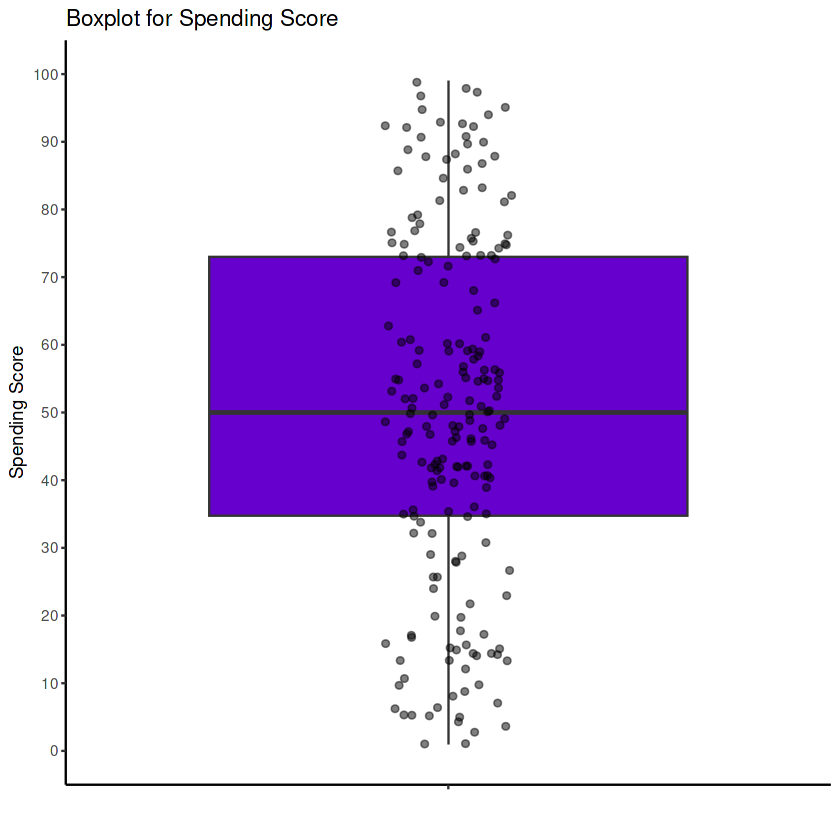

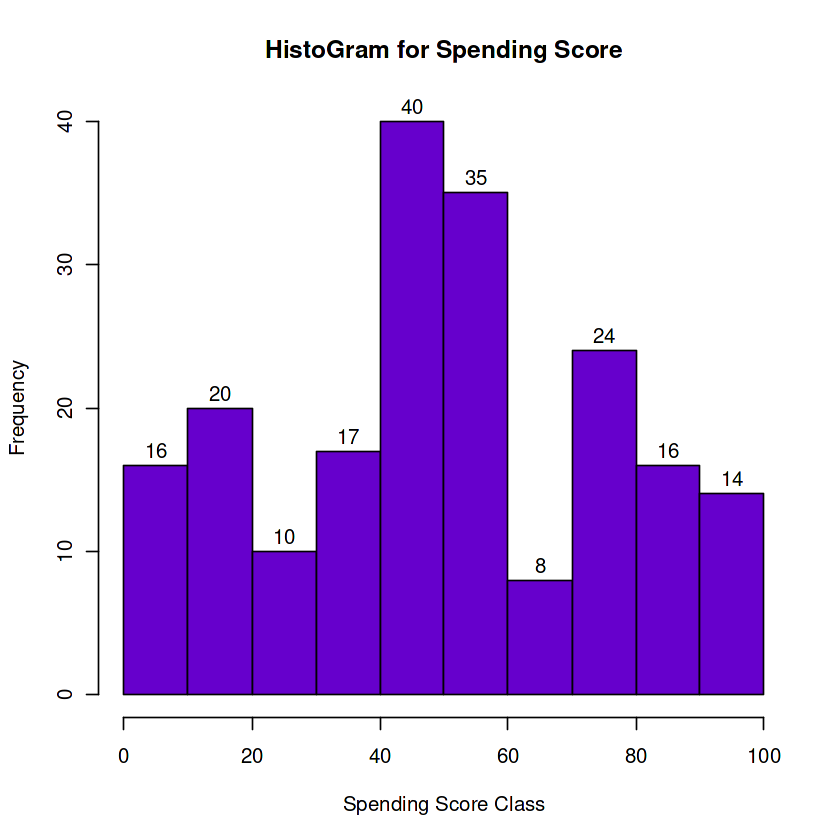

In [8]:
# Boxplot for Spending score
ggplot(customer_data, aes(x = "", y = Spending.Score..1.100.)) +
  geom_boxplot(fill = "#6600cc") +
  geom_jitter(width = 0.1, color = "black", alpha = 0.5) +
  scale_y_continuous( breaks = seq(0,100,10), limits = c(0,100)) +
  labs(title = "Boxplot for Spending Score", x = '', y = 'Spending Score') +
  theme_classic()

# Histogram for Spending Score
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

**From the distrubution of the spending score above, it's clear that the majority of our customers fall within the spending range of 30 to 60.**

# # # K-means Algorithm
K-means clustering is a type of unsupervised machine learning algorithm used to classify items into groups, or clusters, based on their features. The ‘K’ in K-means represents the number of clusters we want to identify in the data.

The algorithm works by finding similarities between items based on their features. Items that are similar to each other are grouped together in the same cluster. The result is that items in the same cluster are more similar to each other than they are to items in other clusters.

# # # # Process for K-means clustering –
+ We specify the number of clusters that we need to create.
+ The algorithm randomly picks as many points in our data as the number of groups we chose. These points are the “centers” of our initial groups.
+  Each point in our data is then assigned to the group that it’s closest to, based on its distance to the center of each group.
+ Once all points have been assigned to a group, we update the center of each group to be the average of all the points in the group.
+ We then repeat the process of assigning each point to the closest group and updating the group centers. We do this over and over again until the groups stop changing.
+ Once the groups stop changing, we have our final groups. Each point in our data belongs to one of these groups.

# # # # Determining Optimal Clusters 
While working with clusters, we need to specify the number of clusters to use. To help us in determining the optimal clusters, there are three popular methods:
+ Elbow method
+ Silhouette method
+ Gap statistic

# # # # Elbow Method
The main idea behind cluster partitioning methods like k-means is to group data points into clusters in a way that minimizes the variation within each cluster.

In simple terms, we want to make sure that the data points within each cluster are similar to each other. To achieve this, we calculate the total variation within all clusters, which is called the intra-cluster variation.

To find the optimal number of clusters for our data using the Elbow Method, we proceed as follows:

+ First, we run the clustering algorithm for different values of k, where k represents the number of clusters. We typically try values of k ranging from 1 to 10.
+ Then, for each value of k, we calculate the total intra-cluster sum of squares (ISS).
+ Next, we plot the ISS against the number of clusters (k). This plot helps us visualize how the total variation changes as we increase the number of clusters.
+ Finally, we look for a point on the plot where there's a bend or a "elbow." This bend indicates the optimal number of clusters for our model.

Now, let's put this method into action using R!



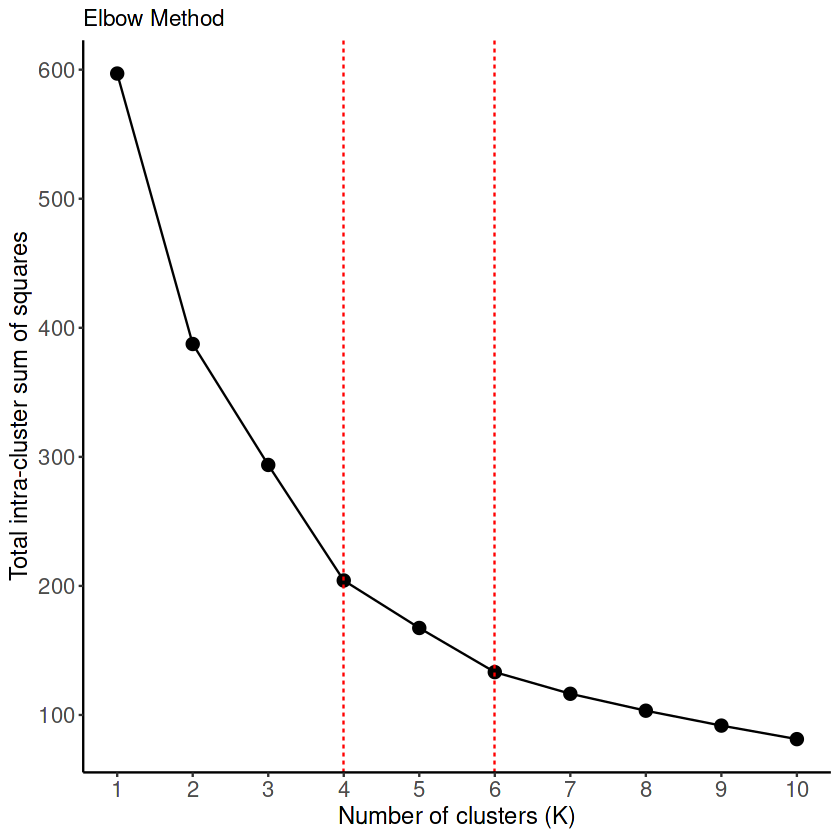

In [108]:
library(purrr)

#scale the data first
scaled_data <- scale(customer_data[,3:5])

# function to calculate total intra-cluster sum of square 
iss <- sapply(1:10,function(k) {kmeans(scaled_data,k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss})

# Combine k.values and iss_values into a data frame
iss_data <- data.frame(k = 1:10, iss = iss)

# Plot using ggplot2
ggplot(iss_data, aes(x = k, y = iss)) +
  geom_line() +
  geom_point(size = 3) +
scale_x_continuous( breaks = seq(0,10,1)) +
scale_y_continuous( breaks = seq(0,600,100)) +
geom_vline(xintercept = c(4,6), linetype = "dashed", color = "red") +
  labs( title = "Elbow Method", x = "Number of clusters (K)",y = "Total intra-cluster sum of squares") +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

For the elbow method results, the optimal number of clusters is typically chosen at the point where the within-cluster sum of squares starts to decrease at a slower rate, creating an "elbow" in the plot. From the above plot, we can onserve this elbow at 4 clusters and a slight one at 6 clusters.

# # # # Average Silhouette Method
With the help of the average silhouette method, we can measure the quality of our clustering operation. With this, we can determine how well within the cluster is the data object. If we obtain a high average silhouette width, it means that we have good clustering. The average silhouette method calculates the mean of silhouette observations for different k values. With the optimal number of k clusters, one can maximize the average silhouette over significant values for k clusters.

Since we want to find optimal number of clusters which inturn should posses the hghest average silhouette width we can run a for loop for each k value and store the average silhouetee width for all of those values in a dataframe format, from here we can then vusualize.

K,Silhouette_Width
<int>,<dbl>
2,0.34
3,0.36
4,0.40
5,0.42
6,0.43
7,0.42
8,0.41
9,0.42
10,0.40


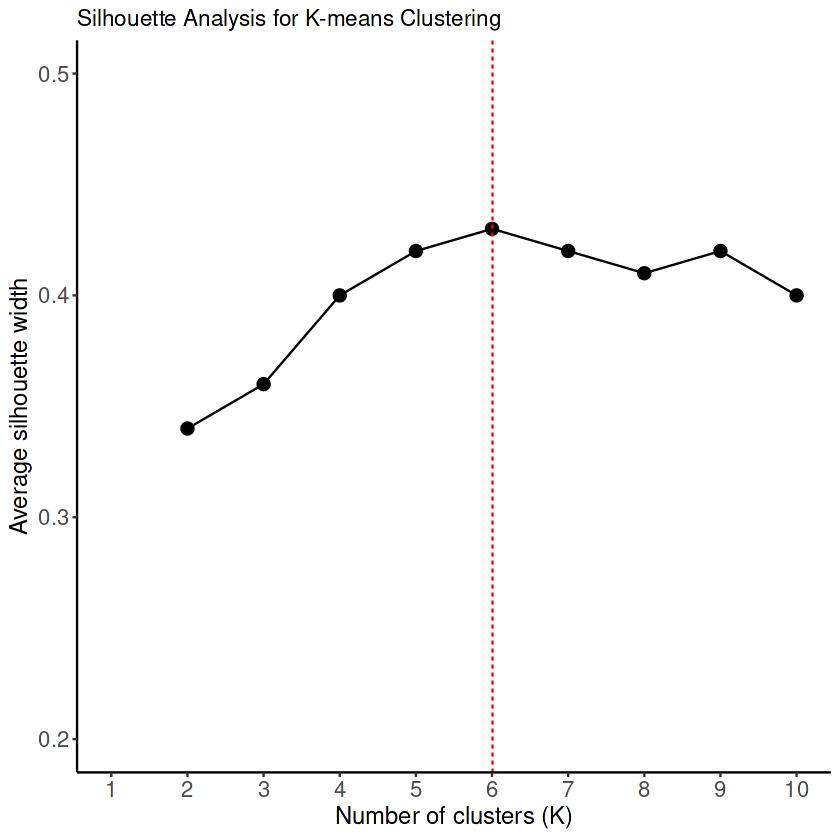

In [73]:
library(NbClust)
library(cluster)
library(xtable)

# Initialize data frame to store silhouette widths
silhouette_df <- data.frame(K = numeric(0), Silhouette_Width = numeric(0))

for (k in 2:10) {
    # Perform k-means clustering
  kmeans_result <- kmeans(scaled_data, k, iter.max = 100, nstart = 50, algorithm = "Lloyd")
    
  # Calculate silhouette widths
  sil_widths <- silhouette(kmeans_result$cluster, dist(scaled_data))
    
  # Compute average silhouette width and store it
  avg_sil_width <- round(mean(sil_widths[, "sil_width"]), 2)
    
  # Create a data frame for plotting
  silhouette_df <- rbind(silhouette_df, data.frame(K = k, Silhouette_Width = avg_sil_width))
}

xtable(silhouette_df)

#Plot silhouette widths using ggplot2
 ggplot(silhouette_df, aes(x = K, y = Silhouette_Width)) +
  geom_line() +
  geom_point(size = 3) +
  scale_x_continuous( breaks = seq(0,10,1), limits = c(1,10)) +
  scale_y_continuous( limits = c(0.2,0.5)) +
  geom_vline(xintercept = 6, linetype = "dashed", color = "red") +
  labs(title = "Silhouette Analysis for K-means Clustering", x = "Number of clusters (K)", y = "Average silhouette width") +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

After applying the silhouette method to assess the optimal number of clusters for our dataset, we observe that k = 6 yields the highest average silhouette width. This suggests that the data is best represented by six distinct clusters according to this method. 

# # # # Gap Statistic Method
We can use this method to any of the clustering method like K-means, hierarchical clustering etc. Using the gap statistic, one can compare the total intracluster variation for different values of k along with their expected values under the null reference distribution of data. For each variable in the dataset, we can calculate the range between min(xi) and max (xj) through which we can produce values uniformly from interval lower bound to upper bound.

For computing the gap statistics method we can utilize the clusGap function for providing gap statistic as well as standard error for a given output.


k,gap,upper,lower
<int>,<dbl>,<dbl>,<dbl>
1,0.2838532,0.2990367,0.2686697
2,0.3309002,0.3461927,0.3156077
3,0.3458884,0.3611034,0.3306734
4,0.4050370,0.4208470,0.3892271
5,0.4139916,0.4288438,0.3991394
6,0.4490230,0.4629010,0.4351450
7,0.4665205,0.4792997,0.4537413
8,0.4628163,0.4778937,0.4477389
9,0.4622868,0.4783930,0.4461806


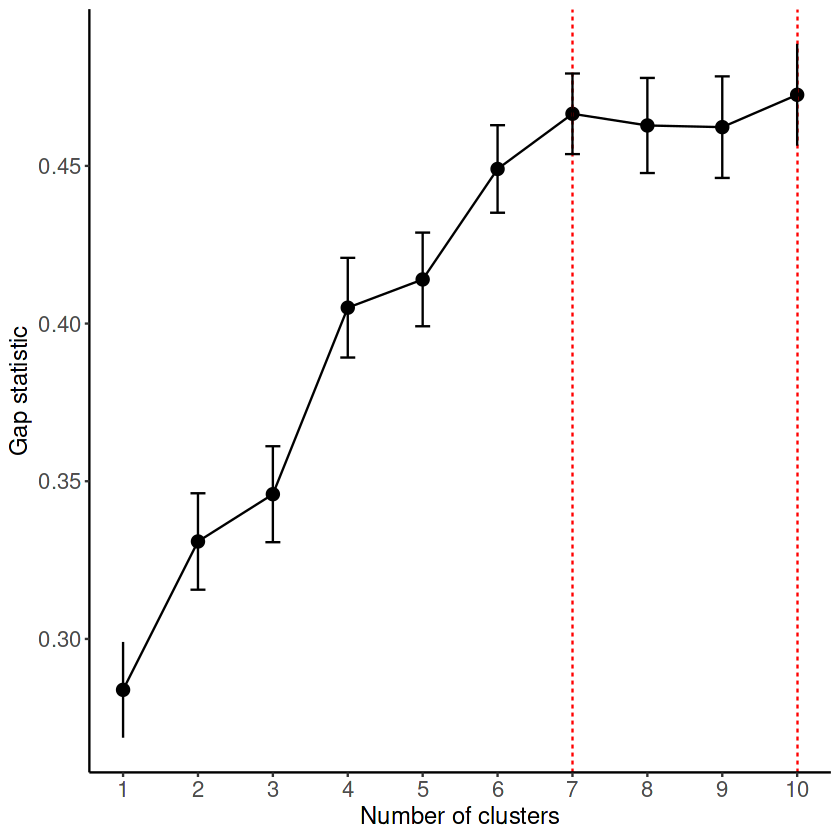

In [79]:

# calculate the Gap Stats
stat_gap <- clusGap(scaled_data, FUN = kmeans, nstart = 50,K.max = 10, B = 50)

# Extract the gap statistics from the clusGap object
gap_stat <- data.frame(
  k = 1:10,
  gap = stat_gap$Tab[, "gap"],
  upper = stat_gap$Tab[, "gap"] + stat_gap$Tab[, "SE.sim"],
  lower = stat_gap$Tab[, "gap"] - stat_gap$Tab[, "SE.sim"]
)

xtable(gap_stat)

# Create the plot
ggplot(gap_stat, aes(x = k, y = gap)) +
  geom_line() +
  geom_point(size = 3) +
  geom_vline(xintercept = c(7,10), linetype = "dashed", color = "red") + 
  scale_x_continuous( breaks = seq(0,10,1), limits = c(1,10)) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2) +
  labs(x = "Number of clusters", y = "Gap statistic") +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))


Using the gap statistic method, we want to identify the number of clusters (k) where the gap statistic reaches its peak or where it starts to plateau. This indicates the optimal number of clusters for the dataset.

Interpreting the results:

+ **k**: The number of clusters being evaluated.
+ **gap**: The gap statistic value for each k. This represents the difference between the observed within-cluster dispersion and the expected                    dispersion under a null reference distribution.
+ **upper**: The upper bound of the gap statistic calculated using bootstrap resampling. It provides a reference for determining whether the observed              gap statistic is significantly higher than what would be expected by chance.
+ **lower**: The lower bound of the gap statistic calculated using bootstrap resampling.

In our example:

As the number of clusters (k) increases, the gap statistic generally increases. It then reaches a peak at k = 7, drops back down again at K = 8 going to 9 then climbs back up at 10 which is the highest we observed. 
Looking at K=7 to K=10 we don't see much difference between the gap stats which makes it abit uncertain which is the optimal amount of clusters. 

For conclusion purposes I decided to go with 6 clusters due to the fact that:
+ we noticed a small elbow at 6 clusters using the elbow method
+ we got 6 clusters for the optimal number using the Silhouette Method

Now let's take a further look at K = 6 as our optimal number of clusters

In [81]:
k6 <- kmeans(scaled_data,6,iter.max=1000,nstart=100,algorithm="Lloyd")
print(k6)

K-means clustering with 6 clusters of sizes 21, 45, 33, 38, 24, 39

Cluster means:
         Age Annual.Income..k.. Spending.Score..1.100.
1  0.4777583         -1.3049552            -1.19344867
2  1.2515802         -0.2396117            -0.04388764
3  0.2211606          1.0805138            -1.28682305
4 -0.8709130         -0.1135003            -0.09334615
5 -0.9735839         -1.3221791             1.03458649
6 -0.4408110          0.9891010             1.23640011

Clustering vector:
  [1] 5 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1
 [38] 5 1 5 2 5 1 5 1 5 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2
 [75] 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
[112] 4 4 4 4 4 2 2 2 2 4 4 4 6 4 6 3 6 3 6 3 6 4 6 3 6 3 6 4 6 3 6 4 6 3 6 3 6
[149] 3 6 3 6 3 6 3 6 3 6 3 6 2 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3
[186] 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6

Within cluster sum of squares by cluster:
[1] 20.52332 23.87015 34.51630 20

In the output of our kmeans operation, we observe a list with several key information. From this, we conclude the useful information being –

+ **cluster** – This is a vector of several integers that denote the cluster which has an allocation of each point.
+ **totss** – This represents the total sum of squares.
+ **centers** – Matrix comprising of several cluster centers
+ **withinss** – This is a vector representing the intra-cluster sum of squares having one component per cluster.
+ **tot.withinss** – This denotes the total intra-cluster sum of squares.
+ **betweenss** – This is the sum of between-cluster squares.
+ **size** – The total number of points that each cluster holds.


# # # # Visualizing the Clustering Results 
To visualize our results to clearly see the relationship between our varaibles and clusters we do the following plots grouping the points by our 6 clusters
+ **Plot1:** Annual.Income..k.. vs Spending.Score..1.100
+ **Plot2:** Age vs Spending.Score..1.100
+ **Plot3:** Age vs Annual.Income..k..

# # # # # Plot 1

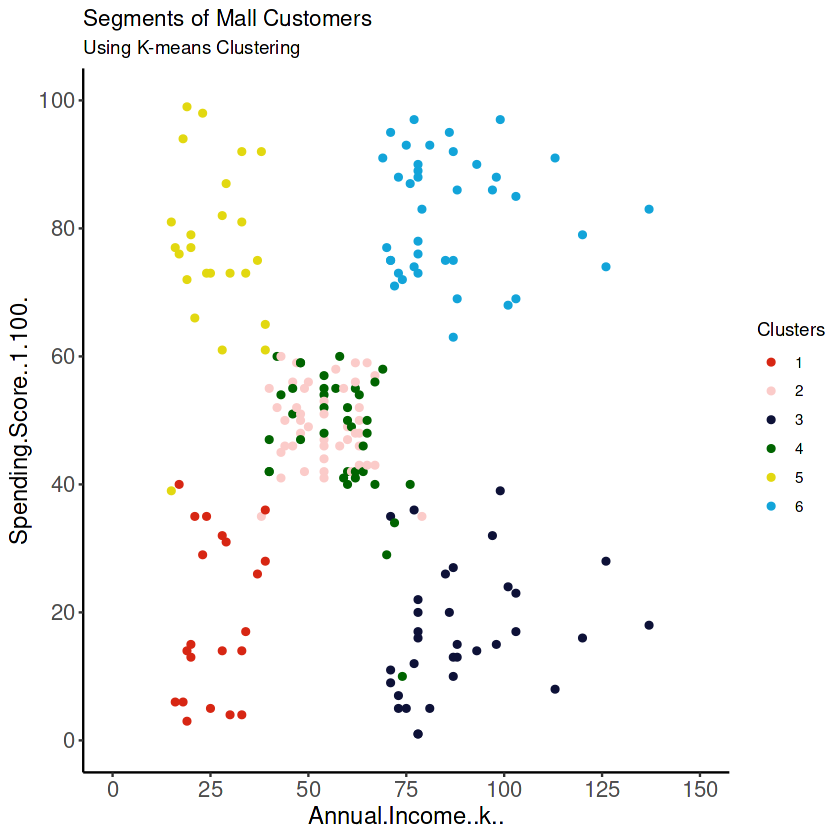

In [133]:
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_manual(name="Clusters",labels=c("1", "2", "3", "4", "5","6"), values =c("#d72613","#fbcbc9","#0d1137","#006400","#e2d810","#12a4d9") ) +
  scale_x_continuous( breaks = seq(0,150,25), limits = c(0,150)) +
  scale_y_continuous( breaks = seq(0,100,20), limits = c(0,100)) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering") +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

From the above visualization, we observe that there 6 clusters or groupings and we can interpret this results as follows :

+ **Cluster 1** – This cluster represents customers with both low annual incomes and low spending score .

+ **Cluster 3** – This cluster represents customers with high annual income but below meduim spending score .

+ **Cluster 2 and 4** – This clusters represents customers with meduim annual income and meduim spending score.

+ **Cluster 5** – This cluster represents customers with low annual income but high spending score .

+ **Cluster 6** – This cluster represents customers with both high annual incomes and high spending score.

# # # # # Plot 2

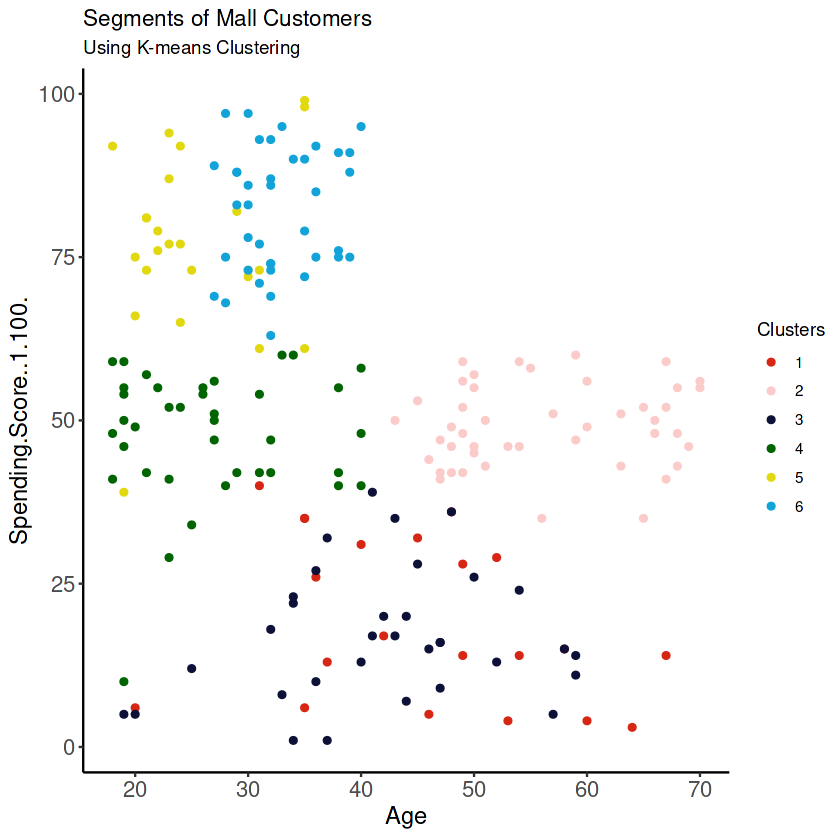

In [135]:
ggplot(customer_data, aes(x =Age, y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_manual(name="Clusters",labels=c("1", "2", "3", "4", "5","6"), values =c("#d72613","#fbcbc9","#0d1137","#006400","#e2d810","#12a4d9") ) + 
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering") +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

Looking at our plot above we can observe the folowing:
+ Customers that have a higher spending score fall within ages **18 to 40** and most under **cluster 5 and 6** with meduim spending score customers also showed in **cluster 4**
+ Customers older than **40** mostly have a medium or below meduim spending score. We see this mostly in **cluster 2**
+ Customers in **cluster 1 and 2** have the lowest spending scores with their ages varying from **18 to around 70**

 # # # # # Plot 3

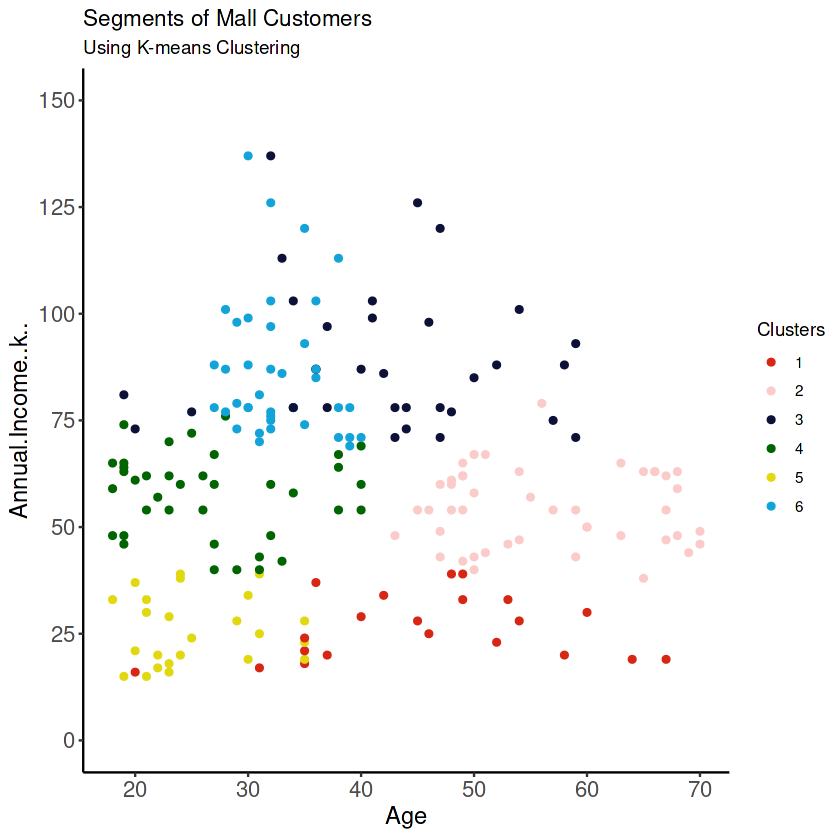

In [137]:
ggplot(customer_data, aes(x =Age, y = Annual.Income..k..)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_manual(name="Clusters",labels=c("1", "2", "3", "4", "5","6"), values =c("#d72613","#fbcbc9","#0d1137","#006400","#e2d810","#12a4d9") ) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering") +
  scale_y_continuous( breaks = seq(0,150,25), limits = c(0,150)) +
  theme_classic() +
  theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

From the plot above we can observe the folowing:
+ Customers in **cluster 6** tend to have a higher anual income and are below ages 40.
+ Customers in **cluster 2 and 4** have a meduim income and vary in age from the lowest up till the highest age in our data
+ Customers in **cluster 1 and 5** tend to have the lowest anual income and also vary in age with most between ages 18 and to 40


# # # # Principal Component Analysis(PCA)
In our customer data, we have three important pieces of information for each customer: their age, their annual income, and their spending score. Each of these tells us something different about the customer. By doing PCA, we’re making our data easier to understand and visualize. Instead of trying to look at three pieces of information at once, we can just look at two. This allows us to see patterns and groups (clusters) in our data more clearly. The way we do it is by combining our original pieces of information (age, annual income, and spending score) into two new ones (Principal Components) that summarize the most important information from our original data. 
Let's proceed to now do a PCA - 

In [112]:
#Do a Principal Component Analysis(PCA) on our scaled data for columns for age, annual income and spending score
pcclust <- prcomp(scaled_data,scale=FALSE) 
summary(pcclust)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.1524 0.9996 0.8202
Proportion of Variance 0.4427 0.3331 0.2243
Cumulative Proportion  0.4427 0.7758 1.0000

In [119]:
# Looking at Dimensions 1 to 3 of the PCA results
pcclust$rotation[,1:3]

,PC1,PC2,PC3
Age,0.70638235,-0.03014116,0.707188441
Annual.Income..k..,-0.04802398,-0.99883160,0.005397916
Spending.Score..1.100.,-0.70619946,0.03777499,0.707004506


# # # # Intepreting the PCs Outputs
Looking at our loadings for the different varaiables after running **pcclust$rotation[,1:3]** the sign of the loading indicates the direction of the relationship between the original variable and the PC. A positive loading indicates that as the original variable increases, the PC also increases. A negative loading indicates that as the original variable increases, the PC decreases.

We can interprete the loadings of the variables on the Principal Components (PCs) as follows:
+ **PC1**: Age and Spending Score have a strong negative correlation, as indicated by their similar loadings of approximately 0.706. This means that as age increases, spending score tends to decrease, and vice versa. Annual Income has a very small negative loading on PC1, indicating that it doesn’t contribute much to this component.
+ **PC2**: Annual Income has a very strong negative loading of approximately -0.999. This means that PC2 largely represents the Annual Income, as it goes up anual income goes down and vice versa. Age and Spending Score have very small loadings on PC2, indicating that they don’t contribute much to this component.
+ **PC3**: Age and Spending Score have a strong positive correlation, as indicated by their similar loadings of approximately 0.707. This means that as age increases, spending score also tends to increase, and vice versa. Annual Income has a very small positive loading on PC3, indicating that it doesn’t contribute much to this component.

After doing a summary of our Principal Component Analysis (PCA) we sees that PC1 explains 44.27% of the variance, PC2 explains 33.31%, and PC3 explains 22.43%. Given this, we decided to plot PC1 vs PC2 because these two components together explain about 77.58% of the total variance in your data, which is a substantial proportion and will give us broad overview of the structure of your data. 

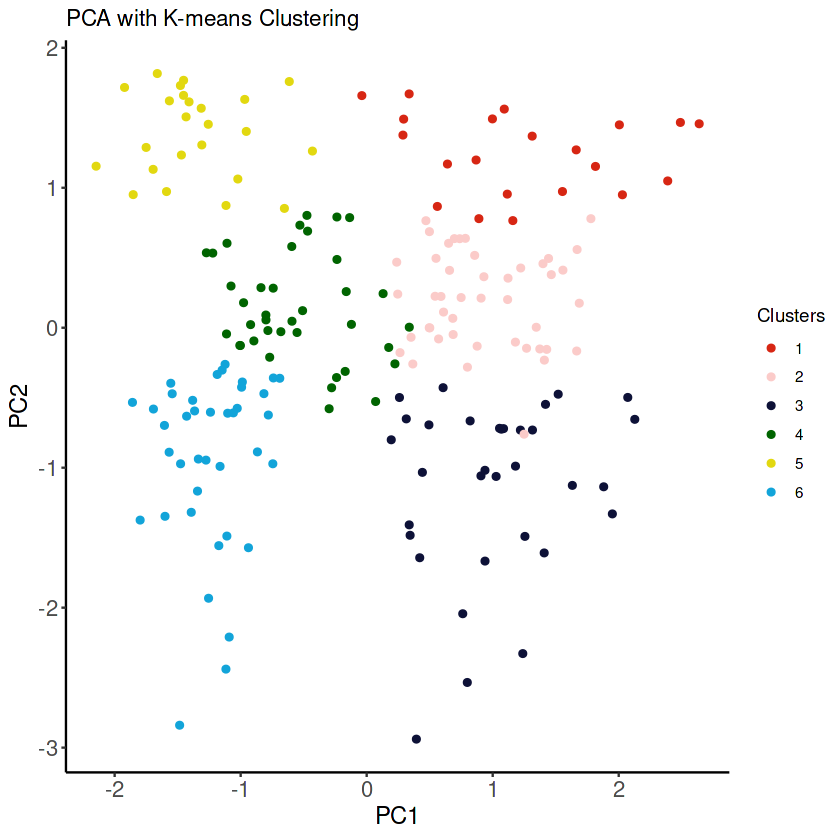

In [121]:
# Change the K-means clusters into characters
digCluster <- as.character(k6$cluster) 

# Selct Dimensions 1 and 2
PCA_Data <- data.frame(pcclust$x[,1:2])
colnames(PCA_Data) <- c("PC1", "PC2")
PCA_Data$cluster <- as.factor(digCluster)

# Plot the dimensions against each other 
ggplot(PCA_Data, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point() +
  scale_color_manual(name = "Clusters",values =c("#d72613","#fbcbc9","#0d1137","#006400","#e2d810","#12a4d9")) +
  labs(x = "PC1", y = "PC2", title = "PCA with K-means Clustering") +
  theme_classic() +
theme(axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))

Our plot here emphasizes the relationship between age and spending score (PC1) and the effect of annual income (PC2).

+ **High PC1, High PC2**: Older customers with lower annual income but higher spending scores, this group most likely fall under **cluster 1**
+ **High PC1, Low PC2**: Older customers with higher annual income and lower spending scores, we see this in **cluster 3**
+ **Low PC1, High PC2**: Younger customers with lower annual income and higher spending scores, this can be associated with **cluster 5**
+ **Low PC1, Low PC2**: Younger customers with higher annual income and lower spending scores, we can observe this in **cluster 6**
+ **Meduim PC1 and PC2**: These customers represent a middle ground in terms of age, annual income, and spending score, we can observe this in **cluster 4 and 2**

# # # # Summary
With the help of clustering, we can understand the variables much better, prompting us to take careful decisions. After doing this analysis we get a better understanding of the identification of customers, with this information companies can release products and services that target customers based on several parameters like income, age, spending patterns, etc. Furthermore, more complex patterns like product reviews are can be taken into consideration for better segmentation.
